In [32]:
# Scaling(Standard_scaler)
# make_pipeline
# FunctionTransform
# Seaborn plots

In [1]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
import sklearn.model_selection as ms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

pd.options.display.max_rows = 14

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
housing = pd.read_csv('housing.csv')
rn_train_set, rn_test_set = ms.train_test_split(housing, test_size = 0.2, random_state=42)
income_categories = housing['median_income'] // 1.5
income_categories[income_categories >= 5] = 5
split = ms.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for training_indices, test_indices in split.split(housing, income_categories):
    stratified_train_set = housing.loc[training_indices]
    stratified_test_set = housing.loc[test_indices]
housing_features = stratified_train_set.drop('median_house_value', axis=1)
housing_labels = stratified_train_set.median_house_value.copy()
imputer = Imputer(strategy='median')
housing_numeric = housing_features.drop('ocean_proximity', axis=1)
imputer.fit(housing_numeric)
imputer.statistics_
X = imputer.transform(housing_numeric)
housing_features_tr = pd.DataFrame(X, columns=housing_numeric.columns)
housing_categorical = housing_features['ocean_proximity']
%run 'CategoricalEncoder.py'
%run 'class.py'
numeric_cols = list(housing_numeric)
categorical_cols = ['ocean_proximity']
numeric_cols_pipeline = Pipeline([('selector', ColumnSelector(numeric_cols)),
                                  ('imputer', Imputer(strategy='median')),
                                  ('attributes_adder', AttributeAdder()),
                                  ('standard_scaler', StandardScaler())
                                 ])
categorical_cols_pipeline = Pipeline([('selector', ColumnSelector(categorical_cols)),
                                      ('encoder', CategoricalEncoder(encoding='onehot-dense'))
                                     ])

full_pipeline = FeatureUnion(transformer_list=[('numeric_pipeline', numeric_cols_pipeline),
                                               ('categorical_pipeline', categorical_cols_pipeline)
                                              ])
housing_transformed = full_pipeline.fit_transform(stratified_train_set)
housing_transformed

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

array([ -118.52  ,    34.26  ,    29.    ,  2127.    ,   433.    ,
        1162.    ,   409.    ,     3.5417])

array([[ 0.55770877, -0.24384572, -1.00717954, ...,  0.        ,
         0.        ,  0.        ],
       [-2.23455235,  2.43896586,  0.18778414, ...,  0.        ,
         0.        ,  1.        ],
       [-0.54121332, -0.07061006, -0.92751529, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.62764017, -0.74014245,  1.8607333 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70256668, -0.75887063,  0.42677688, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58767937, -0.67927587,  0.1081199 , ...,  0.        ,
         0.        ,  0.        ]])

In [3]:
#linear regression
lin_reg = LinearRegression()
x = lin_reg.fit(housing_transformed, housing_labels)
housing_predictions = lin_reg.predict(housing_transformed)
h=list(housing_labels)
train_mse1=mean_squared_error(h,housing_predictions)
np.sqrt(train_mse1)
r2_score(h,housing_predictions)

#DecisionTree Regressor
dt_reg = DecisionTreeRegressor()
x = dt_reg.fit(housing_transformed, housing_labels)
housing_predictions2 = dt_reg.predict(housing_transformed)
train_mse2 = mean_squared_error(housing_labels, housing_predictions2)
np.sqrt(train_mse2)
r2_score(housing_labels, housing_predictions2)

#RandomForestRegressor
rf_reg = RandomForestRegressor()
x = rf_reg.fit(housing_transformed, housing_labels)
housing_predictions3 = rf_reg.predict(housing_transformed)
train_mse3 = mean_squared_error(housing_labels, housing_predictions3)
np.sqrt(train_mse3)
r2_score(housing_labels, housing_predictions3)


67997.592882691912

0.65158541863086272

0.0

1.0

22153.854893631262

0.96301651286754097

# StandardScaler

In [41]:
numeric_cols_pipeline = Pipeline([('selector', ColumnSelector(numeric_cols)),
                                  ('imputer', Imputer(strategy='median')),
                                  ('attributes_adder', AttributeAdder()),
                                 ])

categorical_cols_pipeline = Pipeline([('selector', ColumnSelector(categorical_cols)),
                                      ('encoder', CategoricalEncoder(encoding='onehot-dense'))
                                     ])

full_pipeline = FeatureUnion(transformer_list=[('numeric_pipeline', numeric_cols_pipeline),
                                               ('categorical_pipeline', categorical_cols_pipeline)
                                              ])
housing_transformed2 = full_pipeline.fit_transform(stratified_train_set)
housing_transformed2

array([[-118.46,   35.12,   16.  , ...,    0.  ,    0.  ,    0.  ],
       [-124.05,   40.85,   31.  , ...,    0.  ,    0.  ,    1.  ],
       [-120.66,   35.49,   17.  , ...,    0.  ,    0.  ,    0.  ],
       ..., 
       [-118.32,   34.06,   52.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.17,   34.02,   34.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.4 ,   34.19,   30.  , ...,    0.  ,    0.  ,    0.  ]])

In [42]:
#linear regression
lin_reg = LinearRegression()
x = lin_reg.fit(housing_transformed2, housing_labels)
housing_predictions = lin_reg.predict(housing_transformed2)
h=list(housing_labels)
train_mse1=mean_squared_error(h,housing_predictions)
np.sqrt(train_mse1)
r2_score(h,housing_predictions)

#DecisionTree Regressor
dt_reg = DecisionTreeRegressor()
x = dt_reg.fit(housing_transformed2, housing_labels)
housing_predictions2 = dt_reg.predict(housing_transformed2)
train_mse2 = mean_squared_error(housing_labels, housing_predictions2)
np.sqrt(train_mse2)
r2_score(housing_labels, housing_predictions2)

#RandomForestRegressor
rf_reg = RandomForestRegressor()
x = rf_reg.fit(housing_transformed2, housing_labels)
housing_predictions3 = rf_reg.predict(housing_transformed2)
train_mse3 = mean_squared_error(housing_labels, housing_predictions3)
np.sqrt(train_mse3)
r2_score(housing_labels, housing_predictions3)


67997.592882691926

0.65158541863086272

0.0

1.0

22268.693323448795

0.96263209819337225

# make_pipeline

In [10]:
from sklearn.pipeline import make_pipeline

In [7]:
make_pipeline(ColumnSelector(categorical_cols),CategoricalEncoder())

Pipeline(steps=[('columnselector', ColumnSelector(column_names=['ocean_proximity'])), ('categoricalencoder', CategoricalEncoder(categories='auto', dtype=<class 'numpy.float64'>,
          encoding='onehot', handle_unknown='error'))])

In [11]:
make_pipeline(ColumnSelector(categorical_cols),AttributeAdder(),StandardScaler())

Pipeline(steps=[('columnselector', ColumnSelector(column_names=['ocean_proximity'])), ('attributeadder', AttributeAdder()), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

# seaborn

In [4]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

In [5]:
import seaborn as sns
sns.set(style='ticks')

In [25]:
sns.pairplot(housing, hue="ocean_proximity",size = 10)
plt.show()

/home/user/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/user/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [6]:
corr_matrix = housing.corr()
corr_matrix = np.abs(corr_matrix)
corr_matrix = corr_matrix.median_house_value.sort_values(ascending=False)

In [7]:
corr_columns = corr_matrix.index[:5]

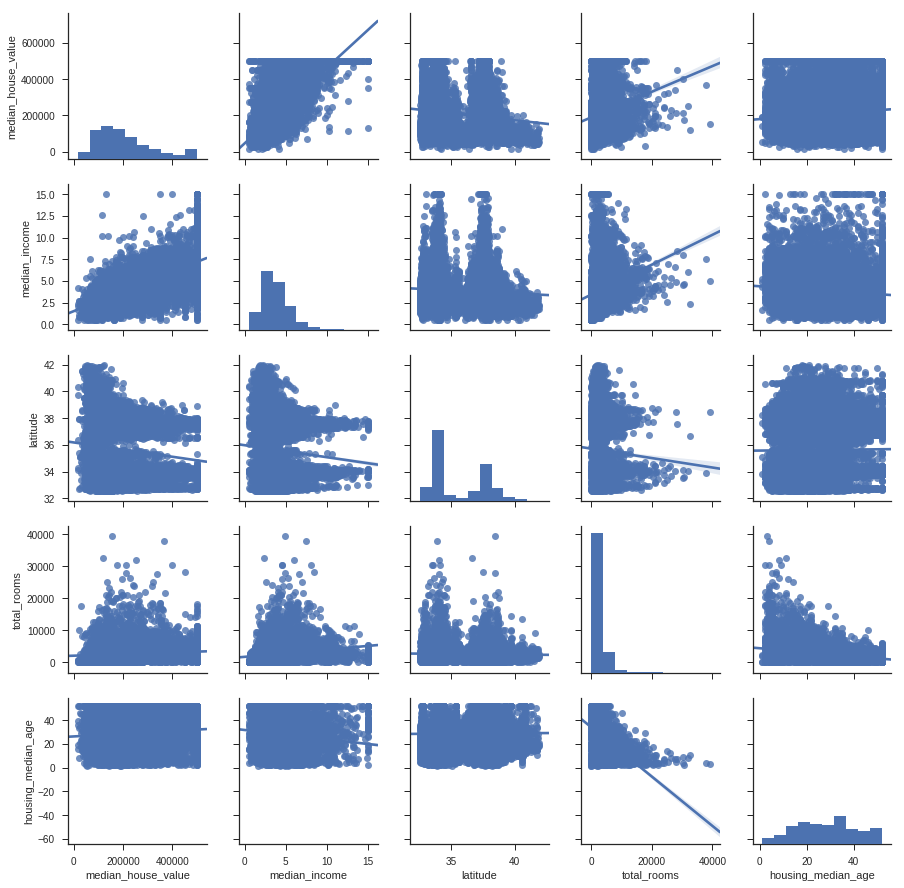

In [36]:
x = sns.pairplot(housing[corr_columns],kind='reg')
plt.show()

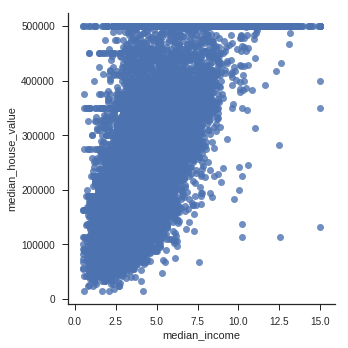

In [8]:
x = sns.lmplot('median_income', 'median_house_value', data=housing, fit_reg=False)
plt.show()

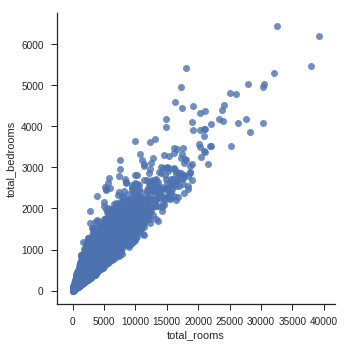

In [12]:
x = sns.lmplot('total_rooms', 'total_bedrooms', data=housing, fit_reg=False)
plt.show()

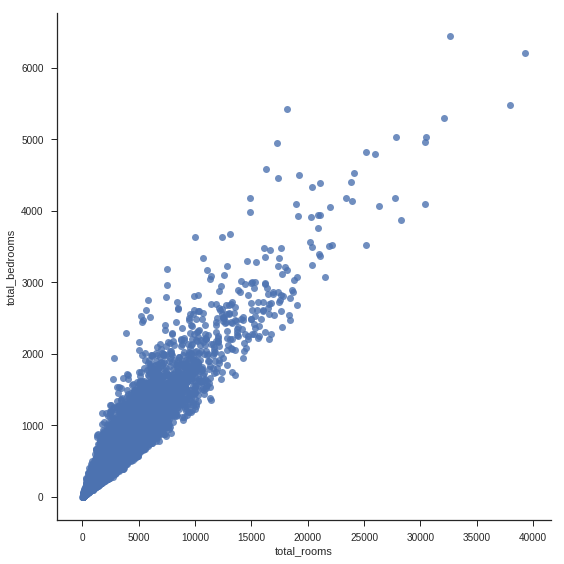

In [19]:
x = sns.lmplot('total_rooms', 'total_bedrooms', data=housing, fit_reg=False,size = 8)
plt.show()

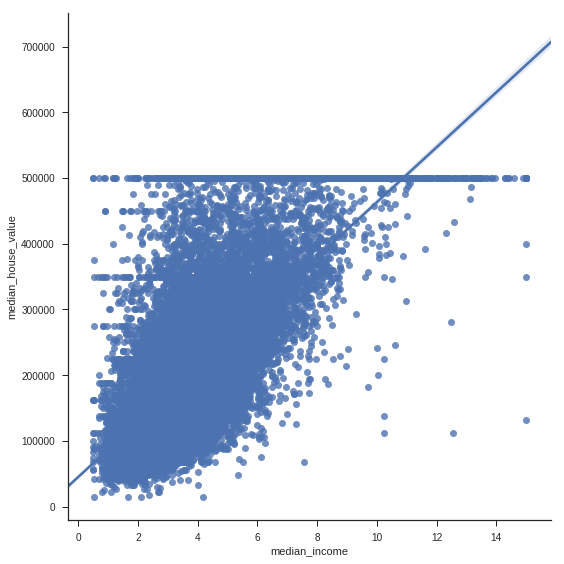

In [20]:
a=sns.lmplot(x='median_income',y='median_house_value',data=housing,size = 8)
plt.show()

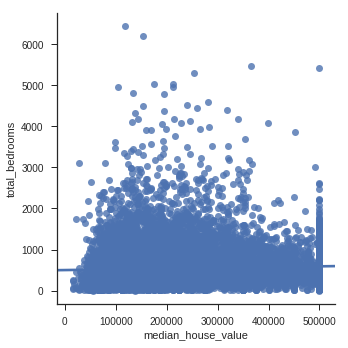

In [22]:
a=sns.lmplot(x='median_house_value',y='total_bedrooms',data=housing)
plt.show()

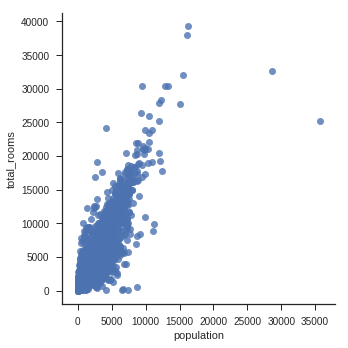

In [8]:
x = sns.lmplot('population', 'total_rooms', data=housing, fit_reg=False)
plt.show()

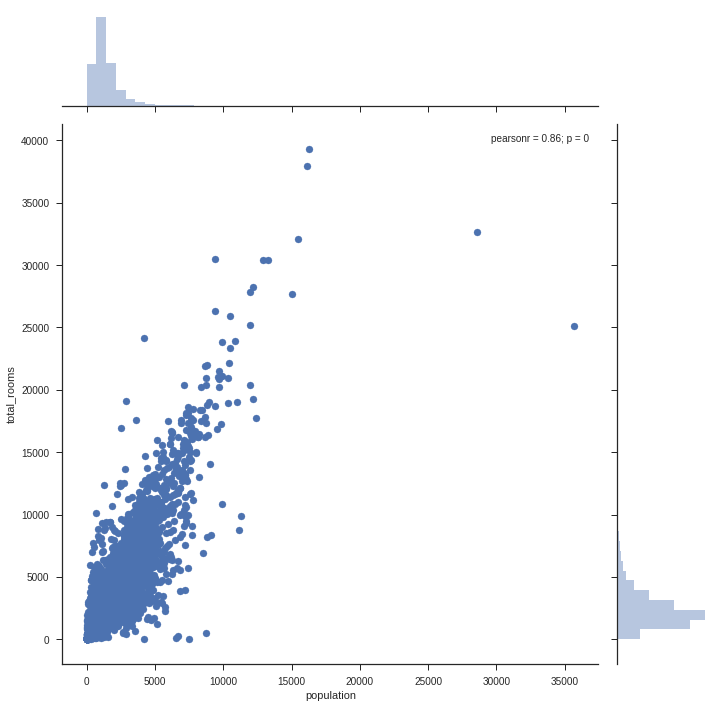

In [24]:
g = sns.jointplot(x="population", y="total_rooms", data=housing,size = 10)
plt.show()

In [43]:
a=sns.jointplot(x='median_income',y='median_house_value',data=housing)


In [50]:
p = housing.drop(['latitude','longitude','housing_median_age','total_bedrooms'],axis=1)

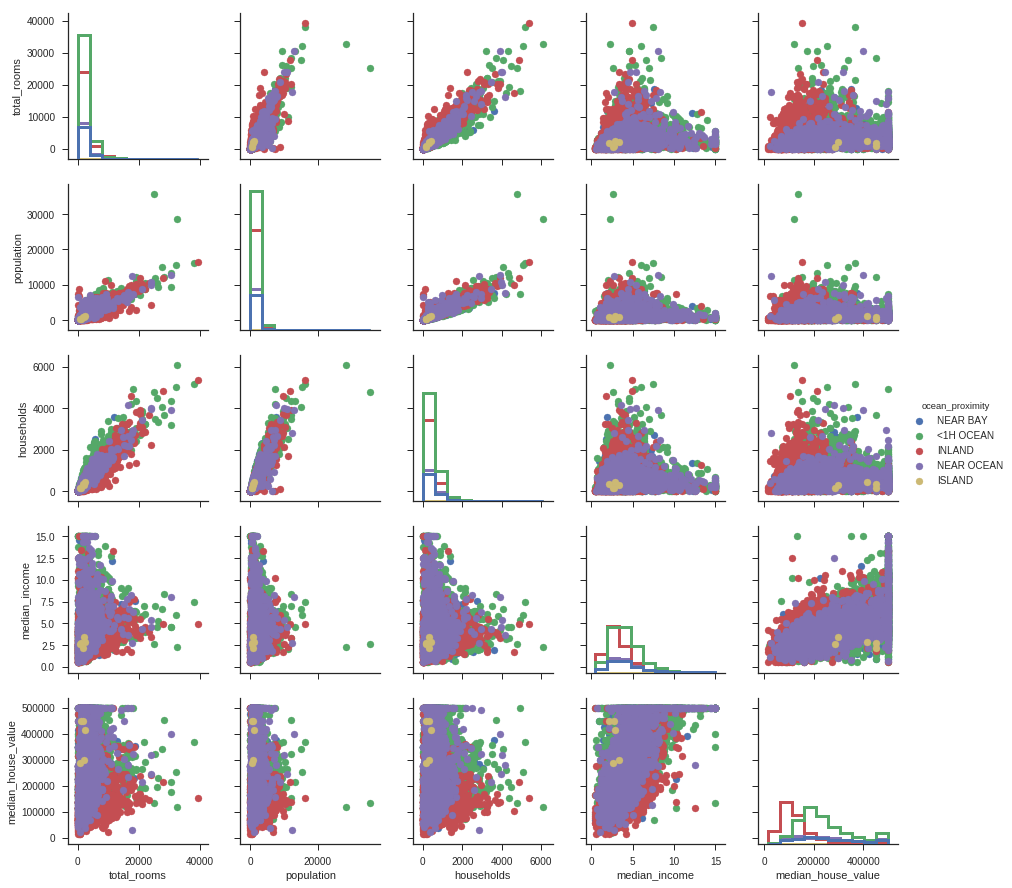

In [51]:
g = sns.PairGrid(p, hue="ocean_proximity")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

# FunctionTransformer

In [4]:
def columns(x):
    return x[numeric_cols].values
columns(housing)

array([[ -1.22230000e+02,   3.78800000e+01,   4.10000000e+01, ...,
          3.22000000e+02,   1.26000000e+02,   8.32520000e+00],
       [ -1.22220000e+02,   3.78600000e+01,   2.10000000e+01, ...,
          2.40100000e+03,   1.13800000e+03,   8.30140000e+00],
       [ -1.22240000e+02,   3.78500000e+01,   5.20000000e+01, ...,
          4.96000000e+02,   1.77000000e+02,   7.25740000e+00],
       ..., 
       [ -1.21220000e+02,   3.94300000e+01,   1.70000000e+01, ...,
          1.00700000e+03,   4.33000000e+02,   1.70000000e+00],
       [ -1.21320000e+02,   3.94300000e+01,   1.80000000e+01, ...,
          7.41000000e+02,   3.49000000e+02,   1.86720000e+00],
       [ -1.21240000e+02,   3.93700000e+01,   1.60000000e+01, ...,
          1.38700000e+03,   5.30000000e+02,   2.38860000e+00]])

In [5]:
from sklearn.preprocessing import FunctionTransformer
p = FunctionTransformer(func = columns,validate =False)

In [6]:
p.fit_transform(housing)

array([[ -1.22230000e+02,   3.78800000e+01,   4.10000000e+01, ...,
          3.22000000e+02,   1.26000000e+02,   8.32520000e+00],
       [ -1.22220000e+02,   3.78600000e+01,   2.10000000e+01, ...,
          2.40100000e+03,   1.13800000e+03,   8.30140000e+00],
       [ -1.22240000e+02,   3.78500000e+01,   5.20000000e+01, ...,
          4.96000000e+02,   1.77000000e+02,   7.25740000e+00],
       ..., 
       [ -1.21220000e+02,   3.94300000e+01,   1.70000000e+01, ...,
          1.00700000e+03,   4.33000000e+02,   1.70000000e+00],
       [ -1.21320000e+02,   3.94300000e+01,   1.80000000e+01, ...,
          7.41000000e+02,   3.49000000e+02,   1.86720000e+00],
       [ -1.21240000e+02,   3.93700000e+01,   1.60000000e+01, ...,
          1.38700000e+03,   5.30000000e+02,   2.38860000e+00]])

In [37]:
def attributeAdder(X):
    rooms_col, bedrooms_col, population_col, households_col = 3, 4, 5, 6
    rph = X[:, rooms_col] / X[:, households_col]
    bph = X[:, bedrooms_col] / X[:, households_col]
    bpr = X[:, bedrooms_col] / X[:, rooms_col]
    pph = X[:, population_col] / X[:, households_col]
    return np.c_[X, rph, bph, bpr, pph]

In [27]:
p1 = FunctionTransformer(func =attributeAdder,validate =False)
p1.fit_transform(housing.values)

array([[-122.23, 37.88, 41.0, ..., 1.0238095238095237, 0.14659090909090908,
        2.5555555555555554],
       [-122.22, 37.86, 21.0, ..., 0.9718804920913884, 0.15579659106916466,
        2.109841827768014],
       [-122.24, 37.85, 52.0, ..., 1.073446327683616, 0.12951601908657123,
        2.8022598870056497],
       ..., 
       [-121.22, 39.43, 17.0, ..., 1.120092378752887, 0.21517302573203195,
        2.325635103926097],
       [-121.32, 39.43, 18.0, ..., 1.171919770773639, 0.21989247311827956,
        2.1232091690544412],
       [-121.24, 39.37, 16.0, ..., 1.1622641509433962, 0.22118491921005387,
        2.616981132075472]], dtype=object)

In [9]:
def columns1(x):
    return x[categorical_cols].values
columns1(housing)

array([['NEAR BAY'],
       ['NEAR BAY'],
       ['NEAR BAY'],
       ..., 
       ['INLAND'],
       ['INLAND'],
       ['INLAND']], dtype=object)

In [10]:
p2 = FunctionTransformer(func =columns1,validate =False)
p2.fit_transform(housing)

array([['NEAR BAY'],
       ['NEAR BAY'],
       ['NEAR BAY'],
       ..., 
       ['INLAND'],
       ['INLAND'],
       ['INLAND']], dtype=object)

In [29]:
numeric_cols_pipeline1 = Pipeline([('selector', FunctionTransformer(func = columns,validate =False)),
                                  ('imputer', Imputer(strategy='median')),
                                  ('attributes_adder', FunctionTransformer(func =attributeAdder,validate =False)),
                                  ('standard_scaler', StandardScaler())
                                 ])

categorical_cols_pipeline1 = Pipeline([('selector', FunctionTransformer(func =columns1,validate =False)),
                                      ('encoder', CategoricalEncoder(encoding='onehot-dense'))
                                     ])

full_pipeline1 = FeatureUnion(transformer_list=[('numeric_pipeline', numeric_cols_pipeline1),
                                               ('categorical_pipeline', categorical_cols_pipeline1)
                                              ])
housing_transformed1 = full_pipeline.fit_transform(stratified_train_set)
housing_transformed1

array([[ 0.55770877, -0.24384572, -1.00717954, ...,  0.        ,
         0.        ,  0.        ],
       [-2.23455235,  2.43896586,  0.18778414, ...,  0.        ,
         0.        ,  1.        ],
       [-0.54121332, -0.07061006, -0.92751529, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.62764017, -0.74014245,  1.8607333 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70256668, -0.75887063,  0.42677688, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58767937, -0.67927587,  0.1081199 , ...,  0.        ,
         0.        ,  0.        ]])

In [43]:
#linear regression
lin_reg = LinearRegression()
x = lin_reg.fit(housing_transformed1, housing_labels)
housing_predictions = lin_reg.predict(housing_transformed1)
h=list(housing_labels)
train_mse1=mean_squared_error(h,housing_predictions)
np.sqrt(train_mse1)
r2_score(h,housing_predictions)

#DecisionTree Regressor
dt_reg = DecisionTreeRegressor()
x = dt_reg.fit(housing_transformed1, housing_labels)
housing_predictions2 = dt_reg.predict(housing_transformed1)
train_mse2 = mean_squared_error(housing_labels, housing_predictions2)
np.sqrt(train_mse2)
r2_score(housing_labels, housing_predictions2)

#RandomForestRegressor
rf_reg = RandomForestRegressor()
x = rf_reg.fit(housing_transformed1, housing_labels)
housing_predictions3 = rf_reg.predict(housing_transformed1)
train_mse3 = mean_squared_error(housing_labels, housing_predictions3)
np.sqrt(train_mse3)
r2_score(housing_labels, housing_predictions3)


67997.592882691912

0.65158541863086272

0.0

1.0

22489.03515942314

0.96188895202056179